# **Exploratory Data Analysis (EDA) For** `Customers Dataset`

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
df = pd.read_csv("Customers.csv")

In [3]:
# Basic inspection
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
print(df.head())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())

Dataset Shape: (200, 4)

First 5 Rows:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Duplicate Rows: 0


In [4]:
# Convert SignupDate to datetime
df['SignupDate'] = pd.to_datetime(df['SignupDate'])

In [5]:
# Extract year and month
df['SignupYear'] = df['SignupDate'].dt.year
df['SignupMonth'] = df['SignupDate'].dt.month

In [6]:
# Regional distribution
region_counts = df['Region'].value_counts()
region_percentage = df['Region'].value_counts(normalize=True) * 100
print("\nCustomer Distribution by Region:")
print(region_counts)
print("\nCustomer Distribution by Region (%):")
print(region_percentage)


Customer Distribution by Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

Customer Distribution by Region (%):
Region
South America    29.5
Europe           25.0
North America    23.0
Asia             22.5
Name: proportion, dtype: float64


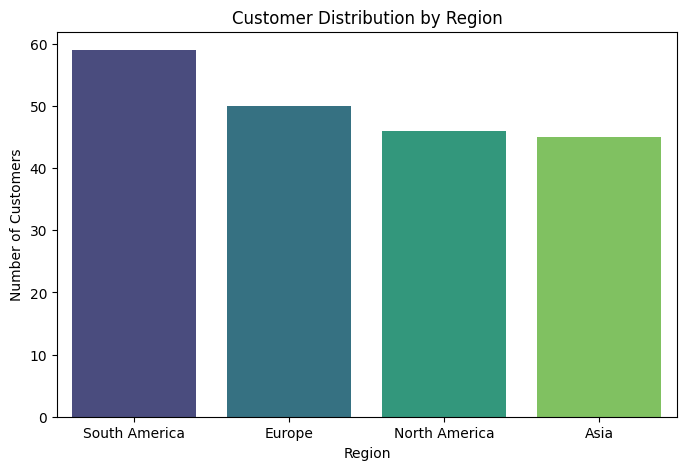

In [7]:
# Plot regional distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Region', order=region_counts.index, palette='viridis')
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

In [8]:
# Signup trends over time
signup_trends = df.groupby('SignupYear').size()
print("\nSignup Trends Over Time:")
print(signup_trends)


Signup Trends Over Time:
SignupYear
2022    64
2023    57
2024    79
dtype: int64


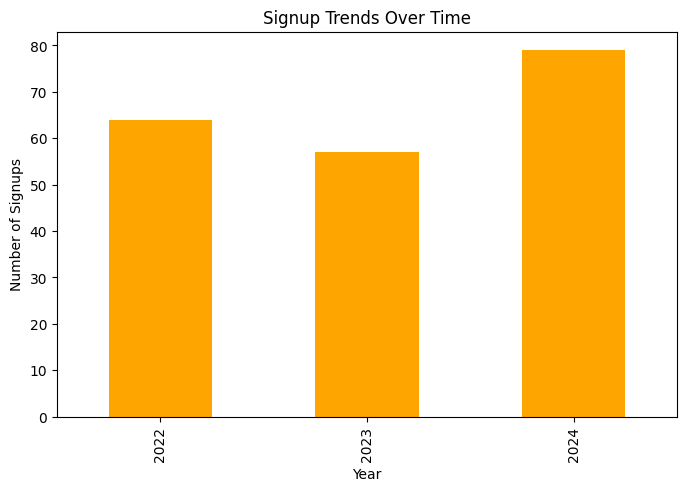

In [9]:
# Plot signup trends
plt.figure(figsize=(8, 5))
signup_trends.plot(kind='bar', color='orange')
plt.title("Signup Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.show()

In [10]:
# Monthly signup trends
monthly_trends = df.groupby('SignupMonth').size()
print("\nMonthly Signup Trends:")
print(monthly_trends)


Monthly Signup Trends:
SignupMonth
1     15
2     21
3     20
4     24
5     17
6     12
7     13
8     10
9     21
10    15
11    19
12    13
dtype: int64


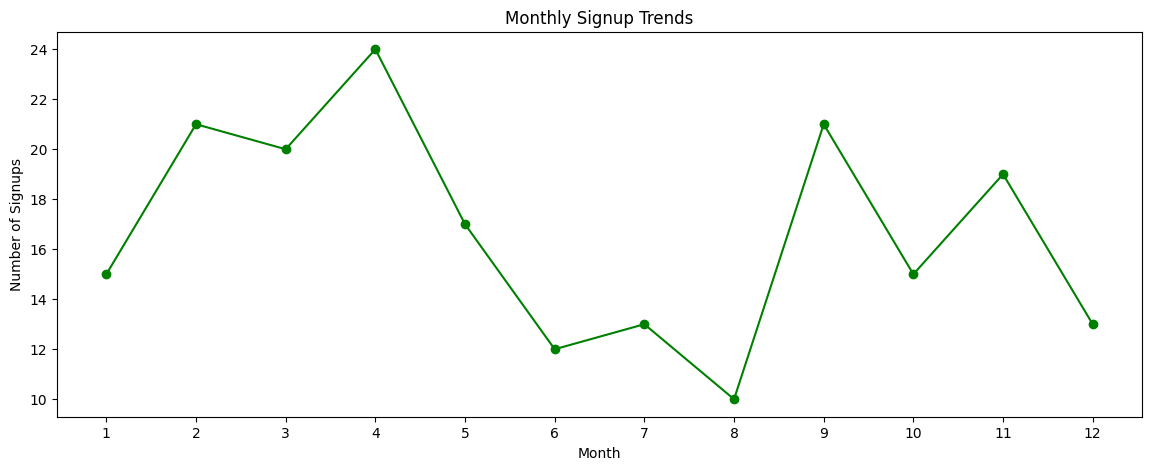

In [11]:
# Plot monthly trends
plt.figure(figsize=(14, 5))
monthly_trends.plot(kind='line', marker='o', color='green')
plt.title("Monthly Signup Trends")
plt.xlabel("Month")
plt.ylabel("Number of Signups")
plt.xticks(range(1, 13))
plt.show()

In [12]:
# Top 5 months with highest signups
top_months = df['SignupMonth'].value_counts().head(5)
print("\nTop 5 Months with Highest Signups:")
print(top_months)


Top 5 Months with Highest Signups:
SignupMonth
4     24
2     21
9     21
3     20
11    19
Name: count, dtype: int64


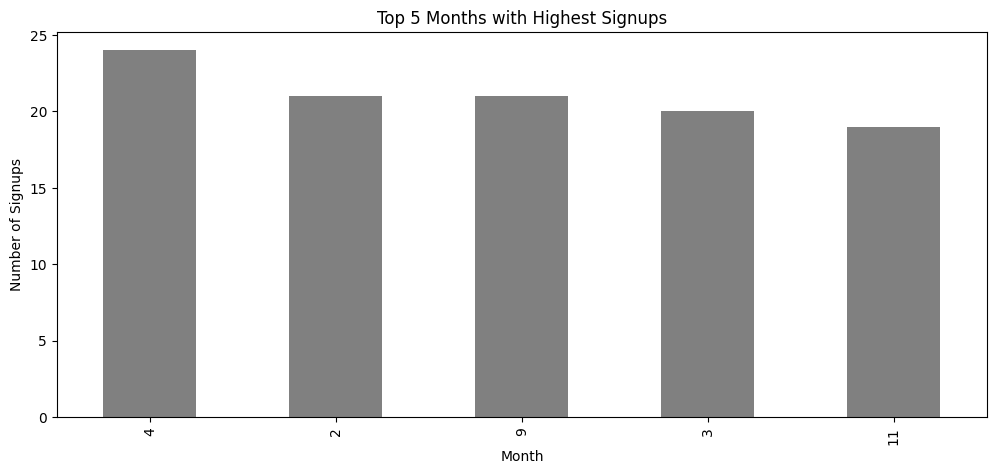

In [13]:
# Plot top months
plt.figure(figsize=(12, 5))
top_months.plot(kind='bar', color='grey')
plt.title("Top 5 Months with Highest Signups")
plt.xlabel("Month")
plt.ylabel("Number of Signups")
plt.show()

# **Exploratory Data Analysis (EDA) For** `Products Dataset`

In [14]:
# Load the dataset
df = pd.read_csv("Products.csv")

In [15]:
# Basic inspection
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
print(df.head())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())

Dataset Shape: (100, 4)

First 5 Rows:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Missing Values:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Duplicate Rows: 0


In [16]:
# Summary statistics for numerical columns
print("\nSummary Statistics for Price:")
print(df['Price'].describe())


Summary Statistics for Price:
count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64


In [17]:
# Distribution of products by category
category_counts = df['Category'].value_counts()
category_percentage = df['Category'].value_counts(normalize=True) * 100
print("\nProduct Distribution by Category:")
print(category_counts)
print("\nProduct Distribution by Category (%):")
print(category_percentage)


Product Distribution by Category:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64

Product Distribution by Category (%):
Category
Books          26.0
Electronics    26.0
Clothing       25.0
Home Decor     23.0
Name: proportion, dtype: float64


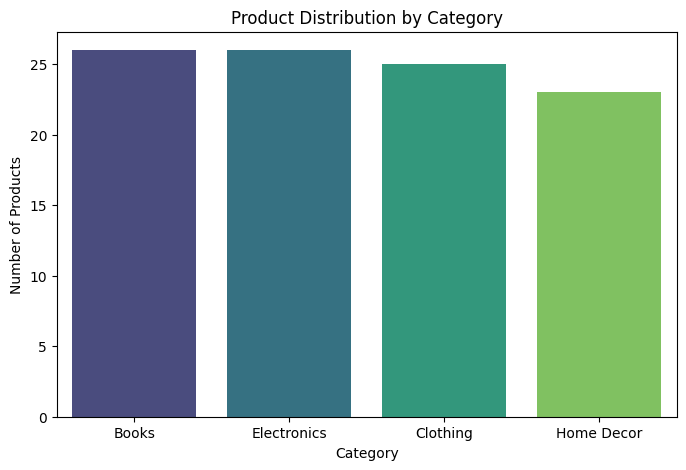

In [18]:
# Plot product distribution by category
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Category', order=category_counts.index, palette='viridis')
plt.title("Product Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.show()

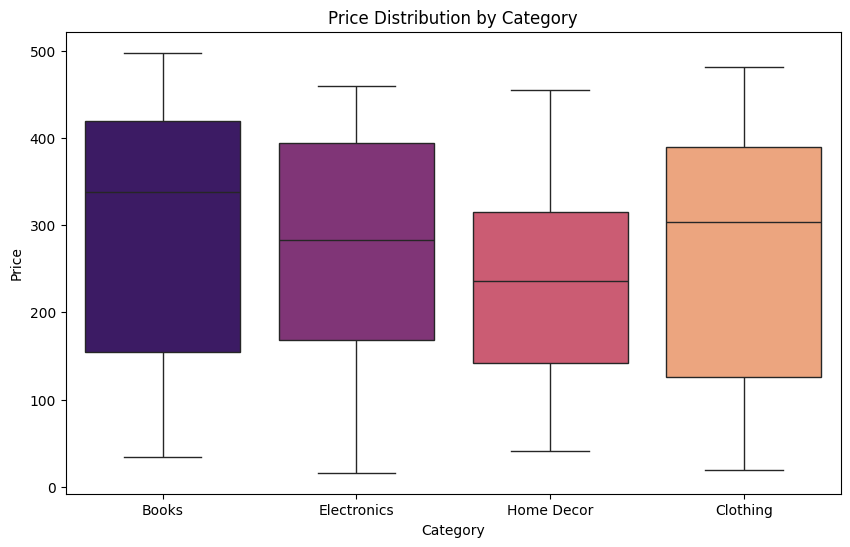

In [19]:
# Price distribution by category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y='Price', palette='magma')
plt.title("Price Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Price")
plt.show()

In [20]:
# Top 5 most expensive products
top_expensive_products = df.nlargest(5, 'Price')
print("\nTop 5 Most Expensive Products:")
print(top_expensive_products)



Top 5 Most Expensive Products:
   ProductID           ProductName     Category   Price
74      P075      TechPro Textbook        Books  497.76
31      P032    BookWorld Cookbook        Books  488.63
44      P045     SoundWave T-Shirt     Clothing  481.78
16      P017   ActiveWear Textbook        Books  469.77
36      P037  SoundWave Smartwatch  Electronics  459.86


In [21]:
# Top 5 cheapest products
top_cheap_products = df.nsmallest(5, 'Price')
print("\nTop 5 Cheapest Products:")
print(top_cheap_products)


Top 5 Cheapest Products:
   ProductID               ProductName     Category  Price
55      P056      SoundWave Smartwatch  Electronics  16.08
43      P044  ActiveWear Running Shoes     Clothing  18.82
13      P014         ActiveWear Jacket     Clothing  26.26
72      P073      ComfortLiving Laptop  Electronics  26.99
34      P035        ActiveWear T-Shirt     Clothing  30.59


In [22]:
# Average price by category
avg_price_by_category = df.groupby('Category')['Price'].mean()
print("\nAverage Price by Category:")
print(avg_price_by_category)


Average Price by Category:
Category
Books          292.212308
Clothing       263.720000
Electronics    275.353462
Home Decor     235.020000
Name: Price, dtype: float64


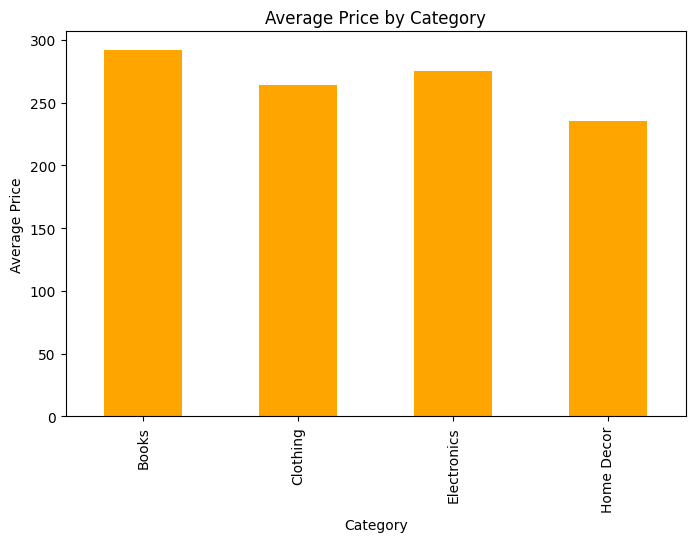

In [23]:
# Plot average price by category
plt.figure(figsize=(8, 5))
avg_price_by_category.plot(kind='bar', color='orange')
plt.title("Average Price by Category")
plt.xlabel("Category")
plt.ylabel("Average Price")
plt.show()

In [24]:
# Total revenue potential by category
revenue_by_category = df.groupby('Category')['Price'].sum()
print("\nTotal Revenue Potential by Category:")
print(revenue_by_category)


Total Revenue Potential by Category:
Category
Books          7597.52
Clothing       6593.00
Electronics    7159.19
Home Decor     5405.46
Name: Price, dtype: float64


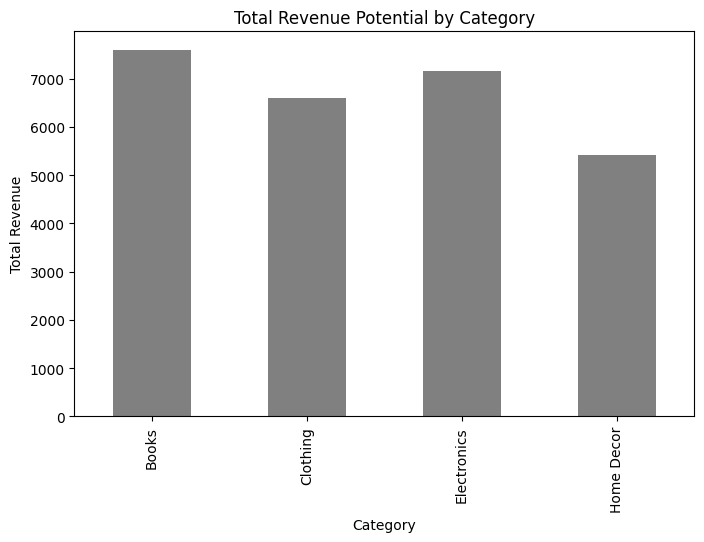

In [25]:
# Plot total revenue potential by category
plt.figure(figsize=(8, 5))
revenue_by_category.plot(kind='bar', color='grey')
plt.title("Total Revenue Potential by Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.show()

# **Exploratory Data Analysis (EDA) For** `Transactions Dataset`

In [26]:
# Load the dataset
df = pd.read_csv("Transactions.csv")

In [27]:
# Basic inspection
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
print(df.head())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())

Dataset Shape: (1000, 7)

First 5 Rows:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  

Missing Values:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Duplicate Rows: 0


In [28]:
# Convert TransactionDate to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [29]:
# Extract year and month from TransactionDate
df['TransactionYear'] = df['TransactionDate'].dt.year
df['TransactionMonth'] = df['TransactionDate'].dt.month

In [30]:
# Summary statistics for numerical columns
print("\nSummary Statistics for Quantity:")
print(df['Quantity'].describe())
print("\nSummary Statistics for TotalValue:")
print(df['TotalValue'].describe())
print("\nSummary Statistics for Price:")
print(df['Price'].describe())


Summary Statistics for Quantity:
count    1000.000000
mean        2.537000
std         1.117981
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: Quantity, dtype: float64

Summary Statistics for TotalValue:
count    1000.000000
mean      689.995560
std       493.144478
min        16.080000
25%       295.295000
50%       588.880000
75%      1011.660000
max      1991.040000
Name: TotalValue, dtype: float64

Summary Statistics for Price:
count    1000.00000
mean      272.55407
std       140.73639
min        16.08000
25%       147.95000
50%       299.93000
75%       404.40000
max       497.76000
Name: Price, dtype: float64


In [31]:
# Distribution of transactions by year
yearly_transactions = df['TransactionYear'].value_counts()
print("\nTransaction Distribution by Year:")
print(yearly_transactions)


Transaction Distribution by Year:
TransactionYear
2024    996
2023      4
Name: count, dtype: int64


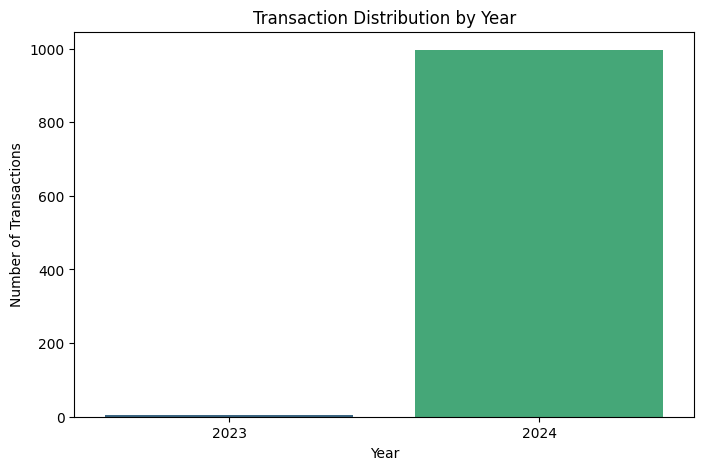

In [32]:
# Plot transaction distribution by year
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='TransactionYear', palette='viridis')
plt.title("Transaction Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Number of Transactions")
plt.show()

In [33]:
# Distribution of transactions by month
monthly_transactions = df['TransactionMonth'].value_counts()
print("\nTransaction Distribution by Month:")
print(monthly_transactions)


Transaction Distribution by Month:
TransactionMonth
1     107
9      96
7      96
8      94
5      86
4      86
12     82
3      80
2      77
10     70
6      69
11     57
Name: count, dtype: int64


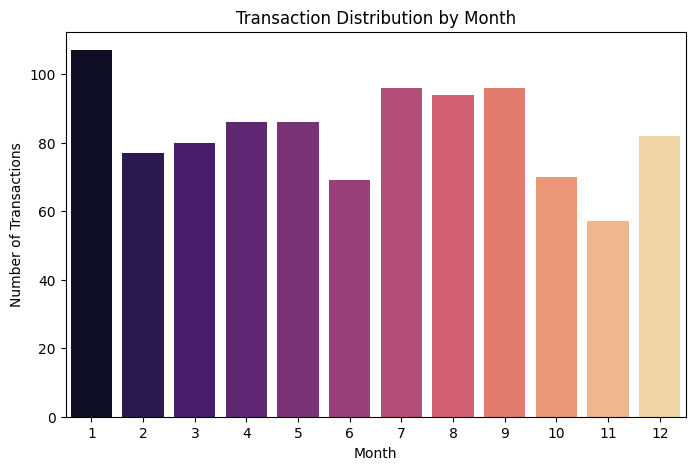

In [34]:
# Plot transaction distribution by month
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='TransactionMonth', palette='magma')
plt.title("Transaction Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.show()

In [35]:
# Total revenue by year
revenue_by_year = df.groupby('TransactionYear')['TotalValue'].sum()
print("\nTotal Revenue by Year:")
print(revenue_by_year)


Total Revenue by Year:
TransactionYear
2023      3769.52
2024    686226.04
Name: TotalValue, dtype: float64


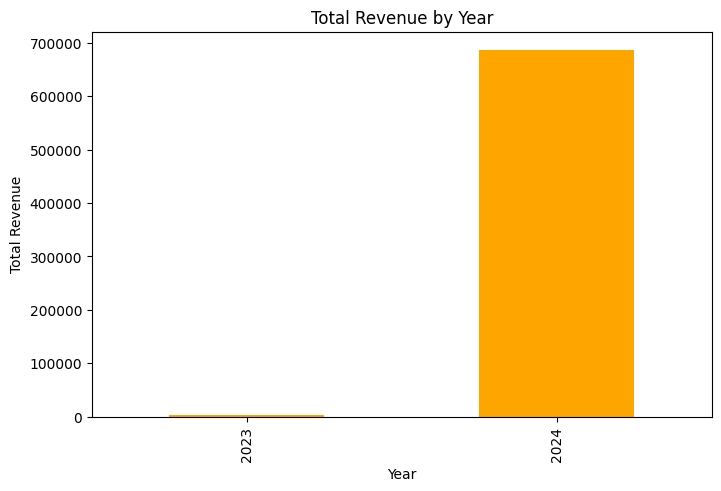

In [36]:
# Plot total revenue by year
plt.figure(figsize=(8, 5))
revenue_by_year.plot(kind='bar', color='orange')
plt.title("Total Revenue by Year")
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.show()

In [37]:
# Top 5 most expensive transactions
top_expensive_transactions = df.nlargest(5, 'TotalValue')
print("\nTop 5 Most Expensive Transactions:")
print(top_expensive_transactions)


Top 5 Most Expensive Transactions:
    TransactionID CustomerID ProductID     TransactionDate  Quantity  \
879        T00928      C0082      P075 2024-09-06 18:39:07         4   
509        T00499      C0065      P032 2024-07-18 02:51:22         4   
971        T00307      C0044      P045 2024-05-30 18:15:28         4   
560        T00070      C0051      P017 2024-12-11 13:46:30         4   
562        T00224      C0171      P017 2024-07-06 23:53:24         4   

     TotalValue   Price  TransactionYear  TransactionMonth  
879     1991.04  497.76             2024                 9  
509     1954.52  488.63             2024                 7  
971     1927.12  481.78             2024                 5  
560     1879.08  469.77             2024                12  
562     1879.08  469.77             2024                 7  


In [38]:
# Top 5 customers with the highest total spending
top_customers = df.groupby('CustomerID')['TotalValue'].sum().nlargest(5)
print("\nTop 5 Customers by Total Spending:")
print(top_customers)


Top 5 Customers by Total Spending:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


In [39]:
# Top 5 products by total revenue
top_products = df.groupby('ProductID')['TotalValue'].sum().nlargest(5)
print("\nTop 5 Products by Total Revenue:")
print(top_products)


Top 5 Products by Total Revenue:
ProductID
P029    19513.80
P079    17946.91
P048    17905.20
P020    15060.92
P062    14592.24
Name: TotalValue, dtype: float64


In [40]:
# Average transaction value by year
avg_transaction_value_by_year = df.groupby('TransactionYear')['TotalValue'].mean()
print("\nAverage Transaction Value by Year:")
print(avg_transaction_value_by_year)


Average Transaction Value by Year:
TransactionYear
2023    942.380000
2024    688.981968
Name: TotalValue, dtype: float64


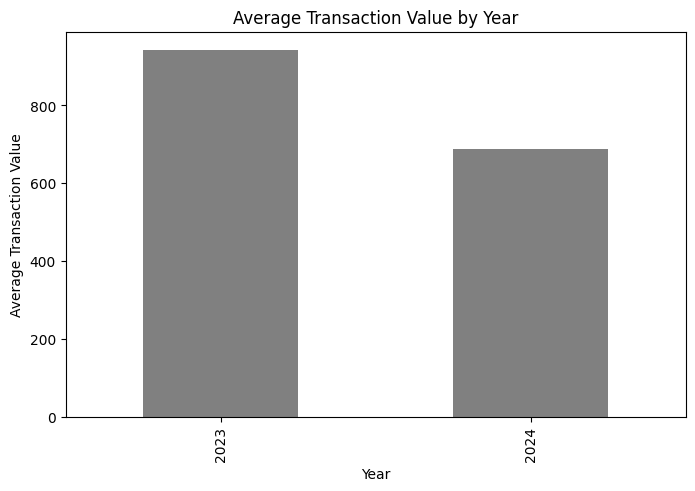

In [41]:
# Plot average transaction value by year
plt.figure(figsize=(8, 5))
avg_transaction_value_by_year.plot(kind='bar', color='grey')
plt.title("Average Transaction Value by Year")
plt.xlabel("Year")
plt.ylabel("Average Transaction Value")
plt.show()